In [34]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [35]:
# setting

start = '1980'
end = '2023'
symbol = 'AAPL'

In [36]:
# load data

data = pd.read_csv(f"Data/DWJ_download/{symbol}.csv", index_col = 0)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099192,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094017,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087117,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089273,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091861,73449600


In [37]:
data.index

Index(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17', '1980-12-18',
       '1980-12-19', '1980-12-22', '1980-12-23', '1980-12-24', '1980-12-26',
       ...
       '2024-02-06', '2024-02-07', '2024-02-08', '2024-02-09', '2024-02-12',
       '2024-02-13', '2024-02-14', '2024-02-15', '2024-02-16', '2024-02-20'],
      dtype='object', name='Date', length=10887)

In [38]:
# set index data type from object to datetime

data.set_index(pd.to_datetime(data.index), inplace = True)
data = data[start:end]
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099192,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094017,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087117,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089273,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091861,73449600


In [39]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.284637,42628800


In [40]:
# rescale data from daily to monthly

data = data.resample('M').last() # last is the last date of each month
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-31,0.152902,0.152902,0.152344,0.152344,0.117737,35750400
1981-01-31,0.127232,0.127232,0.126116,0.126116,0.097467,46188800
1981-02-28,0.118304,0.119420,0.118304,0.118304,0.091430,14761600
1981-03-31,0.110491,0.110491,0.109375,0.109375,0.084529,15993600
1981-04-30,0.126674,0.127790,0.126674,0.126674,0.097898,12611200
...,...,...,...,...,...,...
2023-08-31,187.839996,189.119995,187.479996,187.869995,187.383713,60794500
2023-09-30,172.020004,173.070007,170.339996,171.210007,170.766830,51814200
2023-10-31,169.350006,170.899994,167.899994,170.770004,170.327972,44846000


In [41]:
# rename a column

data.rename(columns = {'Adj Close': 'price'}, inplace = True)
data

,Open,High,Low,Close,price,Volume
Date,,,,,,
1980-12-31,0.152902,0.152902,0.152344,0.152344,0.117737,35750400
1981-01-31,0.127232,0.127232,0.126116,0.126116,0.097467,46188800
1981-02-28,0.118304,0.119420,0.118304,0.118304,0.091430,14761600
1981-03-31,0.110491,0.110491,0.109375,0.109375,0.084529,15993600
1981-04-30,0.126674,0.127790,0.126674,0.126674,0.097898,12611200
...,...,...,...,...,...,...
2023-08-31,187.839996,189.119995,187.479996,187.869995,187.383713,60794500
2023-09-30,172.020004,173.070007,170.339996,171.210007,170.766830,51814200
2023-10-31,169.350006,170.899994,167.899994,170.770004,170.327972,44846000


In [42]:
# get a column to study

df = data['price']
df.head()

Date
1980-12-31    0.117737
1981-01-31    0.097467
1981-02-28    0.091430
1981-03-31    0.084529
1981-04-30    0.097898
Freq: M, Name: price, dtype: float64

In [43]:
df.tail()

Date
2023-08-31    187.383713
2023-09-30    170.766830
2023-10-31    170.327972
2023-11-30    189.707916
2023-12-31    192.284637
Freq: M, Name: price, dtype: float64

In [44]:
data.shape

(517, 6)

### ARIMA (p, d, q)
It is the combination of autoregressive, integration, and moving average

- AR autoregressive: relationship between observation and lagged observation คือความสัมพันธ์ของตัวมันกับตัวมันเองในอดีต เช่น t-4 ก็คือการหา model ความสัมพันธ์ของราคาในปัจจุบันด้วย model ย้อนหลังไป 4 วัน แต่ละวันก็มี Coeficient ต่างกันนะ
- l integration: Integration, to differencing to make data stationary ตัวนี้จะไม่เจอในสมการข้างล่างนะ เพราะมันคือ parameter ของกระบวนการ integration ที่เอา data ไป diff เช่น diff 2 ครั้ง d = 2
- MA moving average: sependency between an observation and residual from moving average to lagged observations คือ MA error นั่นเอง 

<img src='Pics/arima.png'>

- <font color = 'green'>**ARIMA (0, 0, 0)**</font>: White noise
- <font color = 'green'>**ARIMA (0, 1, 0)**</font>: d = 1 Random walk
- <font color = 'green'>**ARIMA (p, 0, q)**</font>: ARIMA(p, q)
- <font color = 'green'>**ARIMA (p, 0, 0)**</font>: AR(p) model
- <font color = 'green'>**ARIMA (0, 0, q)**</font>: MA(q) model

In [45]:
df_diff = df.diff()
df_diff

Date
1980-12-31          NaN
1981-01-31    -0.020270
1981-02-28    -0.006037
1981-03-31    -0.006901
1981-04-30     0.013369
                ...    
2023-08-31    -8.293549
2023-09-30   -16.616882
2023-10-31    -0.438858
2023-11-30    19.379944
2023-12-31     2.576721
Freq: M, Name: price, Length: 517, dtype: float64

In [46]:
df_diff = df_diff.dropna()
df_diff

Date
1981-01-31    -0.020270
1981-02-28    -0.006037
1981-03-31    -0.006901
1981-04-30     0.013369
1981-05-31     0.016388
                ...    
2023-08-31    -8.293549
2023-09-30   -16.616882
2023-10-31    -0.438858
2023-11-30    19.379944
2023-12-31     2.576721
Freq: M, Name: price, Length: 516, dtype: float64

<AxesSubplot: title={'center': 'AAPL Price'}, xlabel='Date'>

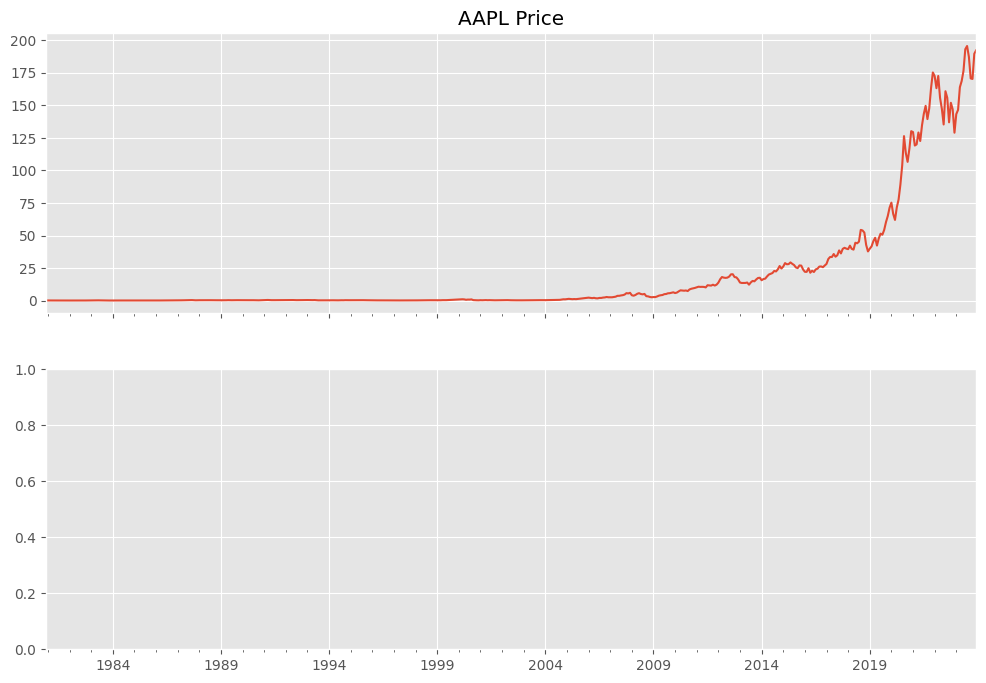

In [47]:
# plot 

plt.rcParams['figure.figsize'] = (12.0, 8.0)

fig, ax = plt.subplots(2, sharex = True)
df.plot(title = f"{symbol} Price", ax = ax[0])

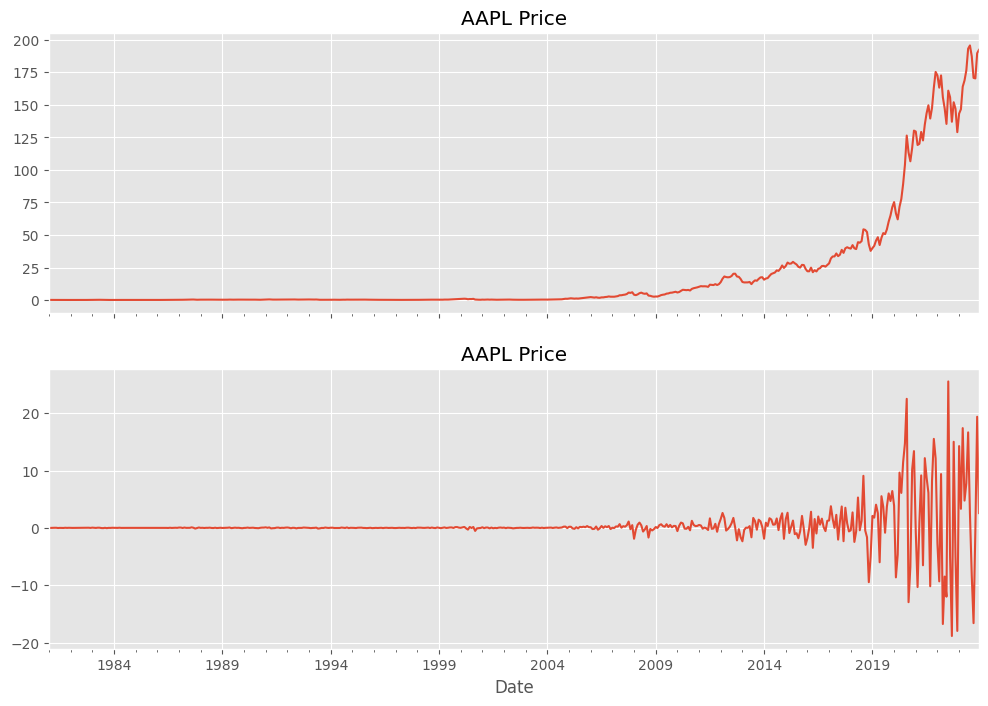

In [48]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)

fig, ax = plt.subplots(2, sharex = True)
df.plot(title = f"{symbol} Price", ax = ax[0])
df_diff.plot(title = f"{symbol} Price", ax = ax[1]) # for diff and dropna data
plt.show()